In [ ]:
import pandas as pd
from scipy import stats

df = pd.read_csv('driverscomplete-introduction-to-data-analytics-QueryResult.csv', sep=';')  

colunas_para_analisar = ['taxa_reclamacao_percentual', 'total_itens_faltando']

z_scores = stats.zscore(df[colunas_para_analisar]) # quantos desvios padrão cada valor está distante da média

df_z = pd.DataFrame(z_scores, columns=[col + '_zscore' for col in colunas_para_analisar]) # coluna com zscore nomeadas

df_final = pd.concat([df, df_z], axis=1)

outliers = (df_z.abs() > 2).any(axis=1) # checa linha por linha se em alguma coluna o Z-Score foi maior que 2 ou menor que -2

df_outliers = df_final[outliers]

print(f"Total de motoristas considerados outliers: {df_outliers.shape[0]}")
df_outliers


Total de motoristas considerados outliers: 0


,driver_id,driver_name,total_pedidos,pedidos_com_reclamacao,taxa_reclamacao_percentual,total_itens_entregues,total_itens_faltando,taxa_reclamacao_percentual_zscore,total_itens_faltando_zscore


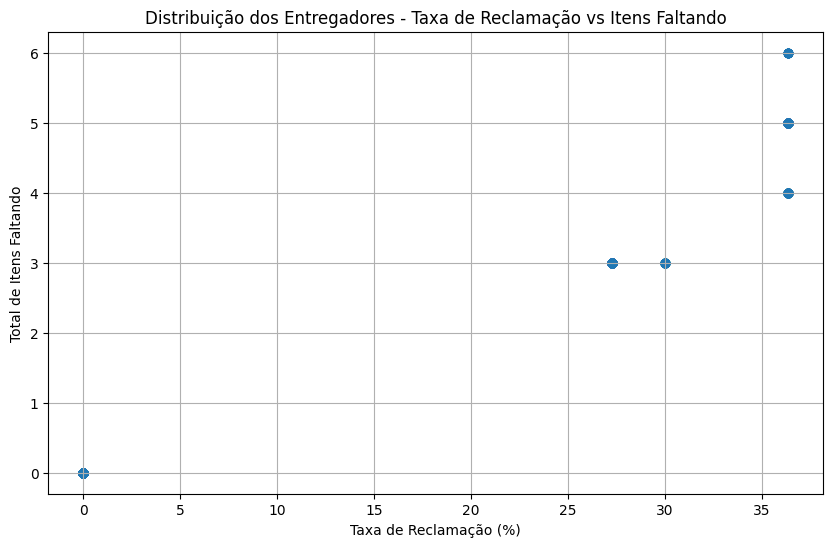

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['taxa_reclamacao_percentual'], df['total_itens_faltando'], alpha=0.6)
plt.title('Distribuição dos Entregadores - Taxa de Reclamação vs Itens Faltando')
plt.xlabel('Taxa de Reclamação (%)')
plt.ylabel('Total de Itens Faltando')
plt.grid(True)
plt.show()
